Calculate precision, recall, and F1 manually from a small confusion matrix

Build a confusion matrix from predicted and actual labels

Implement MSE, MAE, and R-squared from scratch

Compare different metrics on the same classification task

Observe how class imbalance affects various classification metrics

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

# 0 - "benign tumor"
# 1 - "malignant tumor"

X = data['data']
y = 1 - data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Text(0.5, 1.0, 'DummyClassifier Confusion Matrix')

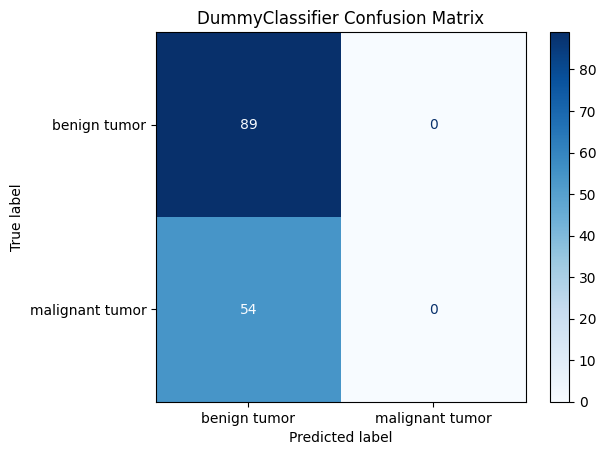

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ['benign tumor', 'malignant tumor']
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf_pred = dummy_clf.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=dummy_clf_pred,
    display_labels=class_labels,
    cmap=plt.cm.Blues,
    normalize=None,    
)

disp.ax_.set_title('DummyClassifier Confusion Matrix')

Text(0.5, 1.0, 'RandomForestClassifier Confusion Matrix')

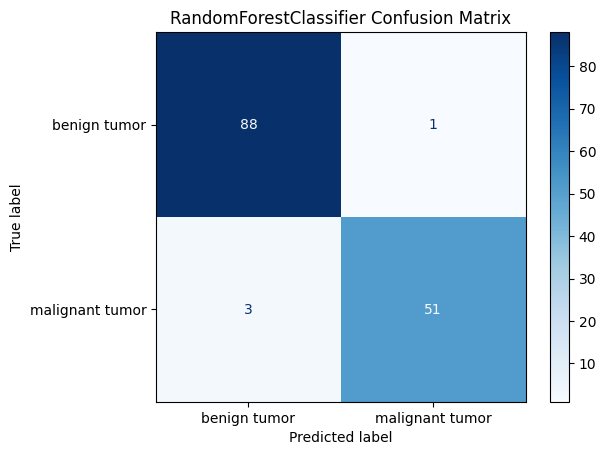

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=rfc_pred,
    display_labels=class_labels,
    cmap=plt.cm.Blues,
    normalize=None,    
)

disp.ax_.set_title('RandomForestClassifier Confusion Matrix')

Text(0.5, 1.0, 'SVMClassifier Confusion Matrix')

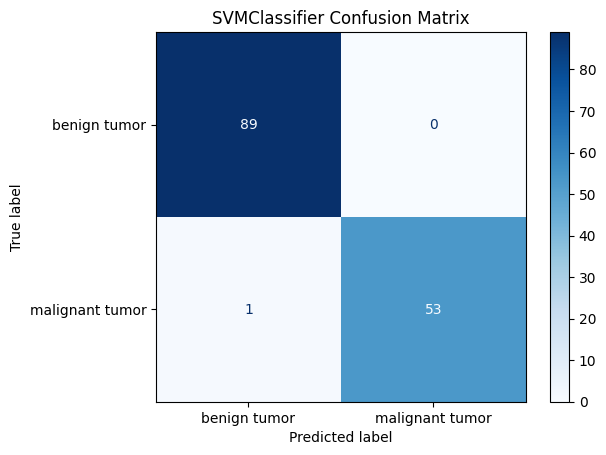

In [9]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
scaled_linsvc = LinearSVC(C=0.01, random_state=42)
scaled_linsvc.fit(ss.transform(X_train), y_train)
scaled_linsvc_pred = scaled_linsvc.predict(ss.transform(X_test))

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=scaled_linsvc_pred,
    display_labels=class_labels,
    cmap=plt.cm.Blues,
    normalize=None,    
)

disp.ax_.set_title('SVMClassifier Confusion Matrix')

In [10]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

print('size', X.shape)
print(data.DESCR)

size (20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, usin

In [11]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [12]:
import numpy as np
def calc_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calc_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calc_rmse(y_true, y_pred):
    return np.sqrt(calc_mse(y_true, y_pred))
def calc_R_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - y_mean) ** 2)) 

In [13]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

rfr_mse = calc_mse(y_test, rfr_pred)
assert rfr_mse == mean_squared_error(y_test, rfr_pred), 'MSE was reailized wrong'
rfr_rmse = calc_rmse(y_test, rfr_pred)
assert rfr_rmse == root_mean_squared_error(y_test, rfr_pred), 'RMSE was reailized wrong'
rfr_mae = calc_mae(y_test, rfr_pred)
assert rfr_mae == mean_absolute_error(y_test, rfr_pred), 'MAE was realizied wrong'

rfr_r2 = calc_R_squared(y_test,rfr_pred)
assert rfr_r2 == r2_score(y_test, rfr_pred), 'R2 was realizied wrong'
print(rfr_r2)

0.8071597746975826


Interpret R2

In [14]:
rfr_r2 = round(rfr_r2, 2)
if rfr_r2 == 1:
    print('Model is IDEAL')
elif 0 < rfr_r2 < 1:
    print(f'Model explains {rfr_r2 * 100}% of the variability in the target variable')
elif rfr_r2 == 0:
    print('Model is no better than predicting the average')
else:
    print('Model is worse than predicting the average')

Model explains 81.0% of the variability in the target variable
